In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [8]:
## Load sample review data
url = "https://tinyurl.com/emat3"
# lines=True tells pandas that each line is a separate JSON object.
df = pd.read_json(url, lines=True)

In [7]:
df.head()

,business_id,user_id,rating,date,review_text,votes
0,59,74,4,2011-07-13,simpson months get again off been course to sa...,"{'helpful': 42, 'cool': 8, 'unhelpful': 4}"
1,522,2301,4,2014-07-27,the the bless oh one okay it if plant he's lev...,"{'helpful': 13, 'cool': 21, 'unhelpful': 6}"
2,835,1519,2,2010-02-04,the once clean so the this to feel abraham den...,"{'helpful': 16, 'cool': 21, 'unhelpful': 2}"
3,145,646,3,2011-03-15,yes explored i held take old i take this and h...,"{'helpful': 21, 'cool': 17, 'unhelpful': 5}"
4,170,190,4,2015-02-13,more little how hey of day come through about ...,"{'helpful': 28, 'cool': 8, 'unhelpful': 7}"


## Clean Data

In [5]:
import re

In [9]:
cleaned = []
for txt in df["review_text"]:
    t = txt.lower()         # lowercase
    t = re.sub(r"[^a-z\s]", "", t)       # remove punctuation/numbers
    cleaned.append(t)

df["cleaned_text"] = cleaned
df.head()

,business_id,user_id,rating,date,review_text,votes,cleaned_text
0,59,74,4,2011-07-13,simpson months get again off been course to sa...,"{'helpful': 42, 'cool': 8, 'unhelpful': 4}",simpson months get again off been course to sa...
1,522,2301,4,2014-07-27,the the bless oh one okay it if plant he's lev...,"{'helpful': 13, 'cool': 21, 'unhelpful': 6}",the the bless oh one okay it if plant hes leve...
2,835,1519,2,2010-02-04,the once clean so the this to feel abraham den...,"{'helpful': 16, 'cool': 21, 'unhelpful': 2}",the once clean so the this to feel abraham den...
3,145,646,3,2011-03-15,yes explored i held take old i take this and h...,"{'helpful': 21, 'cool': 17, 'unhelpful': 5}",yes explored i held take old i take this and h...
4,170,190,4,2015-02-13,more little how hey of day come through about ...,"{'helpful': 28, 'cool': 8, 'unhelpful': 7}",more little how hey of day come through about ...


## Tokenize


In [10]:
df["tokens"] = df["cleaned_text"].apply(lambda x: x.split())
df.head()

,business_id,user_id,rating,date,review_text,votes,cleaned_text,tokens
0,59,74,4,2011-07-13,simpson months get again off been course to sa...,"{'helpful': 42, 'cool': 8, 'unhelpful': 4}",simpson months get again off been course to sa...,"[simpson, months, get, again, off, been, cours..."
1,522,2301,4,2014-07-27,the the bless oh one okay it if plant he's lev...,"{'helpful': 13, 'cool': 21, 'unhelpful': 6}",the the bless oh one okay it if plant hes leve...,"[the, the, bless, oh, one, okay, it, if, plant..."
2,835,1519,2,2010-02-04,the once clean so the this to feel abraham den...,"{'helpful': 16, 'cool': 21, 'unhelpful': 2}",the once clean so the this to feel abraham den...,"[the, once, clean, so, the, this, to, feel, ab..."
3,145,646,3,2011-03-15,yes explored i held take old i take this and h...,"{'helpful': 21, 'cool': 17, 'unhelpful': 5}",yes explored i held take old i take this and h...,"[yes, explored, i, held, take, old, i, take, t..."
4,170,190,4,2015-02-13,more little how hey of day come through about ...,"{'helpful': 28, 'cool': 8, 'unhelpful': 7}",more little how hey of day come through about ...,"[more, little, how, hey, of, day, come, throug..."


## Word Frequencies

In [12]:
from collections import Counter
# Flatten all tokens into one list
all_words = []
for tokens in df["tokens"]:
    for word in tokens:
        all_words.append(word)
        
word_counts = Counter(all_words)
print(word_counts.most_common(10))

[('the', 6954), ('you', 6326), ('i', 5757), ('a', 5176), ('to', 4420), ('and', 3042), ('of', 2706), ('it', 2316), ('my', 2114), ('is', 2106)]


## Filter out words (text cleaning again)

In [24]:
!pip install spacy
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
#stop_words = {"the", "is", "to", "and", "a", "of", "it", "in", "i", "you", "my", "for", "on", "at"}

all_words = []
for tokens in df["tokens"]:
    for word in tokens:
        if word not in stop_words:
            all_words.append(word)
        
word_counts = Counter(all_words)
print(word_counts.most_common(10))

[('oh', 1658), ('im', 1548), ('dont', 1149), ('like', 936), ('know', 826), ('youre', 820), ('homer', 784), ('thats', 726), ('hey', 693), ('right', 667)]


## Visualize


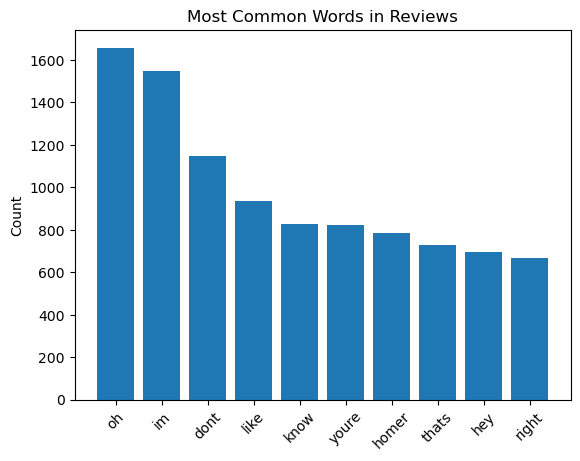

In [25]:
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title("Most Common Words in Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Simple NLP Demo

In [26]:
!pip install textblob
from textblob import TextBlob

In [28]:
# Polarity ranges from -1 (negative) to +1 (positive).
# 
sentiments = []
for review in df["review_text"]:
    blob = TextBlob(review)
    sentiments.append(blob.sentiment.polarity)

df["sentiment"] = sentiments
df.head()

,business_id,user_id,rating,date,review_text,votes,cleaned_text,tokens,sentiment
0,59,74,4,2011-07-13,simpson months get again off been course to sa...,"{'helpful': 42, 'cool': 8, 'unhelpful': 4}",simpson months get again off been course to sa...,"[simpson, months, get, again, off, been, cours...",0.700000
1,522,2301,4,2014-07-27,the the bless oh one okay it if plant he's lev...,"{'helpful': 13, 'cool': 21, 'unhelpful': 6}",the the bless oh one okay it if plant hes leve...,"[the, the, bless, oh, one, okay, it, if, plant...",0.392857
2,835,1519,2,2010-02-04,the once clean so the this to feel abraham den...,"{'helpful': 16, 'cool': 21, 'unhelpful': 2}",the once clean so the this to feel abraham den...,"[the, once, clean, so, the, this, to, feel, ab...",0.366667
3,145,646,3,2011-03-15,yes explored i held take old i take this and h...,"{'helpful': 21, 'cool': 17, 'unhelpful': 5}",yes explored i held take old i take this and h...,"[yes, explored, i, held, take, old, i, take, t...",0.050000
4,170,190,4,2015-02-13,more little how hey of day come through about ...,"{'helpful': 28, 'cool': 8, 'unhelpful': 7}",more little how hey of day come through about ...,"[more, little, how, hey, of, day, come, throug...",0.270833


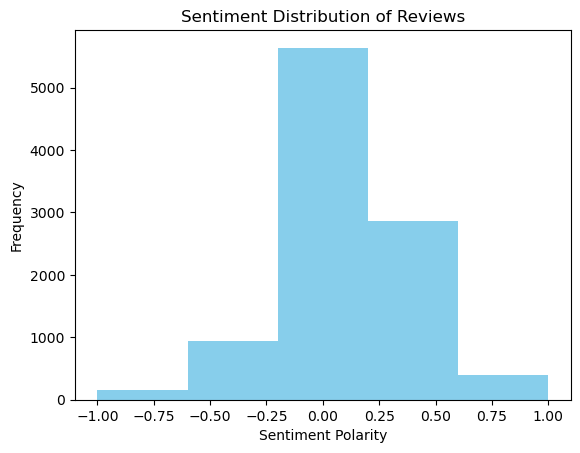

In [29]:
plt.hist(df["sentiment"], bins=5, color="skyblue")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()